In [5]:
import pandas as pd
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import os

# Working with PASSION Dataset

✨ Thank you for your interest in exploring the **PASSION dataset**! ✨ 

In this notebook, we’ll take you on a quick walkthrough of the dataset’s essentials 🗂️, guiding you through its structure, key features, and basic commands to help you interact with it efficiently. Whether you're here to analyze 📊, visualize 📈, or develop models 🤖, this guide will provide a solid foundation for working with PASSION dataset.

Let’s dive in and get started! 🚀


In [7]:
# print the current working directory
print("Current working directory:", os.getcwd())
csv="./label.csv"
image_folder_path="./images"

Current working directory: /Users/gloriastucchi/Downloads/PASSION_MICCAI_2024


## Dataset Overview

Below, you’ll find a preview of the **PASSION dataset**, showing the first few entries. This dataset contains a range of demographic and clinical information about study subjects from four african countries 🌍. Each row represents an individual participant, along with details about their characteristics and diagnosed conditions. Here’s a breakdown of the columns you’ll encounter:

- **subject_id**: Unique identifier for each participant.
- **country**: Country of origin for the participant.
- **age**: Age of the participant in years.
- **sex**: Sex of the participant, denoted by 'm' (male) or 'f' (female).
- **fitzpatrick**: Fitzpatrick skin type, represented numerically, which classifies skin based on its reaction to light ☀️.
- **body_loc**: Specific locations on the body affected, listed as semicolon-separated values.
- **impetig**: Indicates the presence (`1.0`) or absence (`0.0`) of impetigo.
- **conditions_PASSION**: Primary diagnosed skin condition, such as eczema or scabies.

This overview offers a glimpse into the diverse health data within PASSION, capturing a spectrum of dermatological conditions in different populations. Let’s explore this data in more detail and see how it can inform insights into dermatological health across regions. 📊


In [8]:
df = pd.read_csv(csv)
df.head()

,subject_id,country,age,sex,fitzpatrick,body_loc,impetig,conditions_PASSION
0,AA00970008,Madagascar,7,m,3,hair; pelvic; arm; leg,1.0,Eczema
1,AA00970009,Madagascar,3,m,4,back; hair; face; foot; hand; torso; arm; leg,1.0,Eczema
2,AA00970025,Madagascar,3,m,3,torso,0.0,Others
3,AA00970040,Madagascar,7,m,4,arm; foot; hand; torso; leg,1.0,Scabies
4,AA00970047,Madagascar,74,m,3,back; pelvic; arm; hand; torso; leg,0.0,Scabies


## Linking CSV Data with Image Files

To effectively analyze the PASSION dataset alongside its associated image files, it is crucial to establish a clear connection between the subject IDs in the CSV file and the filenames of the images. This linkage enables us to correlate the clinical data with the visual data, providing richer insights. Here’s a step-by-step guide on how we will achieve this with an example:

1. **Understanding Subject IDs in Filenames**: Each image filename contains a unique `subject_id` that corresponds to a participant in the PASSION dataset. The subject ID typically appears as a prefix in the filename, formatted as `{subject_id}_{integer}.jpg`, where `integer` may indicate the order or count of images related to that specific case.

2. **Extracting Subject IDs from Image Filenames**: We will extract the subject IDs from the list of image filenames. This process involves splitting each filename at the underscore `_` and retrieving the first segment, which corresponds to the `subject_id`. This step ensures we have a clear list of all subject IDs represented in the image files.

3. **Creating a Mapping from the CSV**: The PASSION dataset is stored in a CSV file that includes a `subject_id` column along with additional details such as the participant's country. We will convert this CSV data into a dictionary that maps each `subject_id` to its corresponding country. This mapping is essential for associating each image with its relevant demographic information from the dataset.

4. **Counting Images and Cases by Country**: With both the extracted subject IDs and the country mapping in hand, we will count how many images exist for each country. This involves iterating over the extracted subject IDs and tallying the images based on their associated country. Additionally, we will determine the number of unique cases (distinct subject IDs) for each country using the original CSV data. This comprehensive counting allows us to understand the distribution of images and cases across different regions.

By following these steps, we can efficiently link the PASSION dataset to its corresponding images, facilitating a thorough analysis of the relationship between visual data and the clinical information captured in the dataset. Let’s dive into the implementation! 🗂️📊


In [9]:
image_files = os.listdir(image_folder_path)

In [10]:
# Extract unique subject_ids from image filenames
image_subject_ids = [file.split('_')[0] for file in image_files]

# Create a dictionary mapping subject_id to country from the DataFrame
subject_country_map = df.set_index('subject_id')['country'].to_dict()

# Initialize dictionaries to count images and cases per country
country_image_count = defaultdict(int)
country_case_count = defaultdict(int)
total_image_count = 0

# Count images per country
for subject_id in image_subject_ids:
    if subject_id in subject_country_map:  # Check if subject_id exists in the DataFrame
        country = subject_country_map[subject_id]
        country_image_count[country] += 1
        total_image_count += 1

# Count unique cases per country
for country in df['country'].unique():
    country_cases = df[df['country'] == country]['subject_id'].nunique()
    country_case_count[country] = country_cases

# Print the total image count, counts of images per country, and case counts per country
print(f"Total matching images: {total_image_count}")
print("Image count per country:")
for country, count in country_image_count.items():
    print(f"{country}: {count}")

print(f"\nTotal cases: {len(df)}")
print("Case count per country:")
for country, count in country_case_count.items():
    print(f"{country}: {count}")

Total matching images: 4901
Image count per country:
Malawi: 2150
Madagascar: 2185
Guinea: 480
Tanzania: 86

Total cases: 1653
Case count per country:
Madagascar: 985
Guinea: 384
Tanzania: 23
Malawi: 261


## Important Notice ⚠️

Please note that the number of cases reported from **Madagascar** in this analysis is correct, as there was a **typo in the original paper**. Thank you for your understanding!


## Extracting and Comparing Subject IDs

In this section, we will extract unique subject IDs from the image filenames and compare them with the subject IDs present in the PASSION dataset. This comparison helps us identify any discrepancies between the images and the data records. Here’s how we will approach this task:

1. **Extracting Unique Subject IDs from Filenames**: We will create a set of unique `subject_ids` by parsing the filenames of the images. Each filename contains a prefix formatted as `{subject_id}_{integer}.jpg`, allowing us to isolate the `subject_id`.

2. **Getting Subject IDs from the DataFrame**: Next, we will retrieve all `subject_ids` from the DataFrame and store them in another set. This will allow us to easily compare the two collections of IDs.

3. **Identifying Unmatched Subject IDs**: We will perform set operations to find:
   - **Unmatched Subject IDs in Images**: Those `subject_ids` extracted from the image filenames that do not have corresponding entries in the DataFrame.
   - **Unmatched Subject IDs in the DataFrame**: Those `subject_ids` in the DataFrame that are not represented in the image files.

4. **Displaying Results**: Finally, we will print the unmatched `subject_ids` from both the images and the DataFrame, providing insight into any missing links between the visual data and clinical records. 

By conducting this check, we ensure that our analysis is based on a complete and accurate dataset, identifying any potential issues that may need to be addressed. Let’s proceed with the implementation! 🔍📂


In [11]:
# Extract unique subject_ids from image filenames
image_subject_ids = set([file.split('_')[0] for file in image_files])

# Get all subject_ids from the DataFrame
df_subject_ids = set(df['subject_id'])

# Find subject_ids in images that are not in the DataFrame
unmatched_image_subject_ids = image_subject_ids - df_subject_ids

# Find subject_ids in the DataFrame that are not in the images
unmatched_df_subject_ids = df_subject_ids - image_subject_ids

# Display results
if unmatched_image_subject_ids:
    print("Subject IDs in images without corresponding patients in the DataFrame:")
    for subject_id in unmatched_image_subject_ids:
        print(subject_id)
else:
    print("All subject IDs in images have corresponding patient data in the DataFrame.")

if unmatched_df_subject_ids:
    print("\nSubject IDs in the DataFrame without corresponding images:")
    for subject_id in unmatched_df_subject_ids:
        print(subject_id)
else:
    print("All subject IDs in the DataFrame have corresponding images.")

All subject IDs in images have corresponding patient data in the DataFrame.
All subject IDs in the DataFrame have corresponding images.


## Regrouping Malawi and Tanzania data together

In [12]:
df['country'] = df['country'].replace({'Malawi': 'EAS', 'Tanzania': 'EAS'})

## Analyzing Conditions by Country

In this section, we will analyze the relationship between the clinical conditions reported in the PASSION dataset and the countries of the participants. To achieve this, we will perform the following steps:

1. **Splitting the 'Country' Column**: The `country` column may contain multiple entries for some participants, indicating that they may belong to more than one country. We will split these entries into separate rows. This process is called "exploding" the DataFrame, which allows us to have each country on a different row for the same participant.

2. **Creating a Pivot Table**: After exploding the `country` column, we will create a pivot table that summarizes the data. In this pivot table:
   - The **index** will consist of the different conditions recorded in the `conditions_PASSION` column.
   - The **columns** will represent the different countries.
   - The **values** will be the count of occurrences for each condition in each country. We will use `size` as our aggregation function to count the occurrences, and we will replace any missing values with `0`.

3. **Reordering the Columns**: To facilitate comparison, we will reorder the columns of the pivot table according to a specified desired order of countries: **'Guinea', 'Madagascar', 'EAS'**.

By executing these steps, we will be able to visually analyze how various conditions are distributed across different countries. Let’s implement this analysis! 🌍📊


In [13]:
# Split the 'country' column lists into separate rows
df_exploded_countries = df.assign(countries=df['country'].str.split(', ')).explode('countries')

# Create a pivot table with conditions as index and countries as columns
condition_country_pivot_table = df_exploded_countries.pivot_table(
    index='conditions_PASSION',
    columns='countries',
    aggfunc='size',
    fill_value=0
)

# Define the desired order of countries for the pivot table
desired_country_order = ['Guinea', 'Madagascar', 'EAS']
condition_country_pivot_table = condition_country_pivot_table[desired_country_order]

# Display the pivot table
condition_country_pivot_table


countries,Guinea,Madagascar,EAS
conditions_PASSION,,,
Eczema,57,301,56
Fungal,230,299,50
Others,39,29,121
Scabies,58,356,57


## Analyzing Body Localizations by Conditions

In this section, we will focus on analyzing the primary body locations affected by different conditions reported in the PASSION dataset. The following steps will guide our analysis:

1. **Creating the Main Localization Column**: We will first derive a new column called `MainLocalization` from the `body_loc` column. This new column will contain the primary body location for each participant, which is determined by taking the first entry from the list of body locations (if available). The `strip()` function is used to remove any leading or trailing whitespace. This ensures that we have a clean and focused representation of the main localization for further analysis.

2. **Exploding the Main Localization Column**: Next, we will prepare the DataFrame for analysis by splitting any entries in the `MainLocalization` column into separate rows. This allows us to have each body location listed on a distinct row for each condition, facilitating a more straightforward aggregation.

3. **Creating a Pivot Table**: We will create a pivot table to summarize the relationship between the conditions recorded in the `conditions_PASSION` column and the main body localizations:
   - The **index** will consist of different conditions.
   - The **columns** will represent the main body locations.
   - The **values** will indicate the count of occurrences for each condition-body location combination. We will use the `size` aggregation function to count these occurrences, filling any missing values with `0`.

By following these steps, we will gain insights into how various conditions correlate with the primary body locations affected. Let’s implement this analysis! 🏥📈


In [14]:
# Create a new column for the main body localization by taking the first entry from 'body_loc'
df['MainBodyLocalization'] = df['body_loc'].apply(lambda x: x.split(';')[0].strip() if pd.notna(x) else x)

# Step 1: Split the main body localization lists into separate rows
df_exploded_body_locations = df.assign(MainBodyLocalization=df['MainBodyLocalization'].str.split(', ')).explode('MainBodyLocalization')

# Step 2: Create a pivot table with conditions as index and body locations as columns
condition_body_location_pivot_table = df_exploded_body_locations.pivot_table(
    index='conditions_PASSION',
    columns='MainBodyLocalization',
    aggfunc='size',
    fill_value=0
)

# Display the result
condition_body_location_pivot_table


MainBodyLocalization,arm,back,face,foot,hair,hand,leg,pelvic,torso
conditions_PASSION,,,,,,,,,
Eczema,41,38,76,37,24,23,29,11,72
Fungal,32,33,33,35,198,36,41,23,109
Others,14,61,41,3,13,1,21,8,16
Scabies,13,147,1,21,0,76,10,54,126


## Analyzing Impetigo Cases in the Dataset

In this section, we will calculate and analyze the prevalence of impetigo cases within the PASSION dataset. Our objective is to determine both the total number of cases and the proportion of cases that involve impetigo. We will perform the following steps:

1. **Calculating Total Cases**: We will first determine the total number of cases in the dataset by counting the number of rows in the DataFrame. This gives us an overview of the dataset size and provides context for subsequent calculations.

2. **Counting Impetigo Cases**: Next, we will count the number of cases where impetigo is present. In the dataset, a value of `1` indicates the presence of impetigo, and we will sum this column to get the total number of impetigo cases.

3. **Calculating the Impetigo Ratio**: We will then calculate the ratio of impetigo cases to the total number of cases. This ratio will help us understand the proportion of participants affected by impetigo relative to the overall dataset. To ensure we avoid any division by zero errors, we will check if the total number of cases is greater than zero before performing this calculation.

4. **Displaying Results**: Finally, we will print the total number of cases, the number of impetigo cases, and the calculated impetigo ratio formatted to two decimal places for clarity.

By analyzing these figures, we can gain insights into the prevalence of impetigo among the participants in the PASSION dataset. Let’s execute this analysis! 📊💉


In [15]:
total_cases = df.shape[0]  # Total number of rows in the DataFrame
impetigo_cases = df['impetig'].sum()  # Count of impetigo cases (1 for presence)

impetigo_ratio = impetigo_cases / total_cases if total_cases > 0 else 0  # Avoid division by zero

# Display the results
print(f"Total Cases: {total_cases}")
print(f"Impetigo Cases: {impetigo_cases}")
print(f"Impetigo Ratio: {impetigo_ratio:.2f}")  # Formatting the ratio to two decimal places

Total Cases: 1653
Impetigo Cases: 191.0
Impetigo Ratio: 0.12


## Visualizing the Distribution of Fitzpatrick Skin Types

To gain deeper insights into the participant demographics within the PASSION dataset, we will visualize the distribution of Fitzpatrick skin types. The Fitzpatrick skin type classification is important for understanding how individuals' skin may react to various environmental factors, including sunlight exposure, and can influence dermatological conditions.

### Steps for Visualization:
1. **Counting Fitzpatrick Skin Types**: We will begin by counting the occurrences of each Fitzpatrick skin type in the dataset. This count will provide a clear overview of how many participants belong to each skin type category.

2. **Creating the Bar Plot**: Next, we will create a bar plot to illustrate the distribution of these skin types visually. The x-axis will represent the different Fitzpatrick skin types, while the y-axis will indicate the number of participants associated with each type. This visualization will help us identify any prevalent skin types among the participants and facilitate a better understanding of the sample population.

3. **Customization**: The plot will be customized with labels, a title, and a grid to enhance readability. We will also rotate the x-axis labels for better visibility, especially if there are many categories.

By visualizing the distribution of Fitzpatrick skin types, we can better understand the demographic context of the dataset, which may be relevant for analyzing the clinical conditions represented in the PASSION dataset. Let’s create the plot! 📊✨


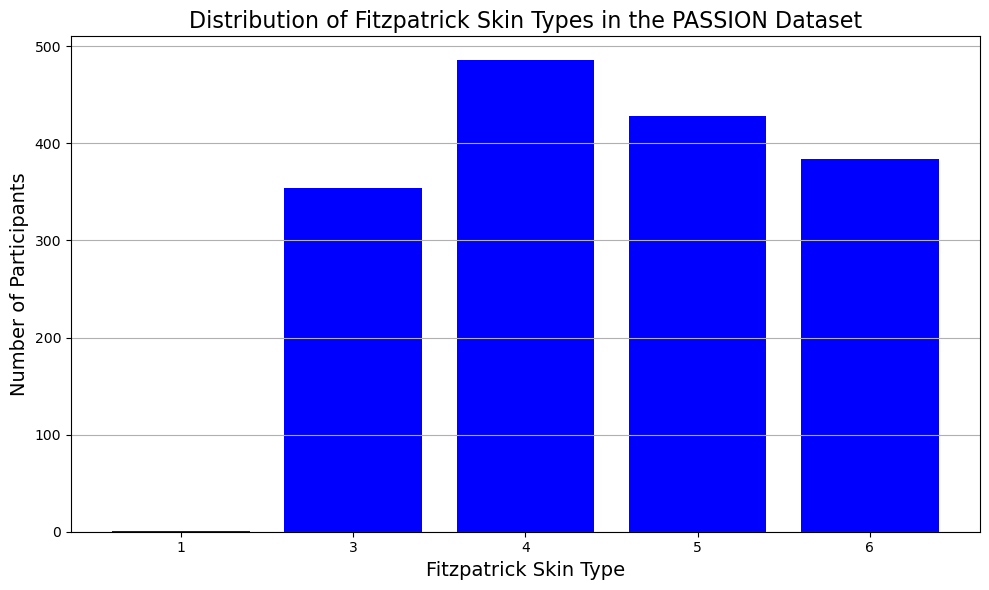

In [16]:
# Count the occurrences of each Fitzpatrick skin type
fitzpatrick_counts = df['fitzpatrick'].value_counts().sort_index()

# Create a simple bar plot for the Fitzpatrick skin type distribution
plt.figure(figsize=(10, 6))
plt.bar(fitzpatrick_counts.index.astype(str), fitzpatrick_counts.values, color='blue')  # Using a single color
plt.title('Distribution of Fitzpatrick Skin Types in the PASSION Dataset', fontsize=16)
plt.xlabel('Fitzpatrick Skin Type', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
plt.xticks(rotation=0)  # No rotation for clarity
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


## Conclusion 🎉

In this notebook, we explored the **PASSION dataset**, which provides valuable insights into various dermatological conditions and their associations with demographic factors such as age, sex, and Fitzpatrick skin type. Through our analysis, we achieved several key objectives:

1. **Data Linking** 🔗: We successfully linked the clinical data from the CSV file with the corresponding image files, establishing a relationship between subject IDs and additional clinical information.

2. **Country and Condition Analysis** 🌍: We examined the distribution of conditions across different countries, providing a clearer understanding of how these conditions vary geographically. Our pivot tables highlighted the prevalence of specific dermatological conditions in different regions.

3. **Body Location and Condition Correlation** 📍: By exploding the body location data, we created visual representations that facilitate comparisons of conditions based on anatomical locations, aiding in the identification of patterns.

4. **Fitzpatrick Skin Type Distribution** 🧑‍🤝‍🧑: The bar plot visualizing the distribution of Fitzpatrick skin types in the dataset revealed essential demographic insights. Understanding skin type prevalence is crucial for tailoring clinical approaches and treatments.

Thank you for exploring the PASSION dataset with us! If you have any questions or suggestions for further analysis, please feel free to reach out per email at philippe.gottfrois@unibas.ch. 🙌


## Important Warning ⚠️

We **do not permit the re-upload** of the PASSION dataset due to the sensitive nature of the data it contains. Users are urged to take full responsibility when utilizing examples from this dataset. If you need to use any data, please do so **wisely** to ensure the prevention of sharing sensitive images.

It is important to note that there are plenty of images within the dataset that are **not sensitive**, and these can be used appropriately in your analyses or presentations. Thank you for your understanding and cooperation in maintaining data safety!

Due to the sensitive nature of the data in the PASSION dataset, **uploading this data to a drive service may result in a ban** from the service provider, which is independent of our control. We strongly advise against sharing or uploading this dataset to any external platforms to avoid any repercussions.

Please handle this data with the utmost care and responsibility. Thank you for your understanding and cooperation!